<a href="https://www.kaggle.com/code/godsonajodo/chess-analysis?scriptVersionId=202111076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [3]:
!pip install imblearn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../input/chess/games.csv")
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Data Cleaning

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()

# Descriptive statistics for numerical columns
descriptive_stats = df.describe()

missing_values


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

We see that our dataset has no missing values. 
Just from the descriptive stats summary, we see that: 
1. The mean rating for white players is approximately 1597, and for black players, it is 1589. If we look at the min-max range, we see white having (784, 2700) and black having (291, 2723). 
2. In terms of duration of the games, we have an avearge of 60 moves, and the fastest win is 1 move. We can assume that this is due to a player aborting the game. We have a maximum of 349 moves, and a guess for this (which may or may not be investigated later) is that we had a competitive endgame with lot of pawn and king movements. Note that these are just hypothesis for now. 
3. The average number of half-moves (ply) before the opening ends is about 5, with a range from 1 to 28 moves.

In [8]:
descriptive_stats

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Instead of caring about the openings and variations, let's focus on just openings alone. 

In [9]:
import re

def clean_opening_name(opening):
    # Step 1: Remove anything after # (indicates variation)
    opening = opening.split('#')[0]
    # Remove other symbols (| and :) 
    opening = opening.split('|')[0].strip()  
    opening = opening.split(':')[0].strip() 
    # Remove keywords like 'Accepted', 'Declined', and numbers (variations)
    opening = re.sub(r'Accepted|Declined|\d+', '', opening)
    # Remove any extra whitespace
    return opening.strip()

# Apply this function to the column
df['opening_name'] = df['opening_name'].apply(clean_opening_name)


In [10]:
df['opening_name'].unique()

array(['Slav Defense', 'Nimzowitsch Defense', "King's Pawn Game",
       "Queen's Pawn Game", 'Philidor Defense', 'Sicilian Defense',
       'Blackmar-Diemer Gambit', 'Italian Game', 'Scandinavian Defense',
       "Van't Kruijs Opening", 'French Defense', 'Four Knights Game',
       'Horwitz Defense', 'English Opening', 'Scotch Game',
       "Queen's Gambit Refused", "Queen's Gambit",
       'Robatsch (Modern) Defense', 'Indian Game', 'Dutch Defense',
       'Zukertort Opening', 'Vienna Game', 'Modern Defense',
       'Blumenfeld Countergambit', "Queen's Pawn", 'Crab Opening',
       "Queen's Indian Defense", 'Gruenfeld Defense',
       'Yusupov-Rubinstein System', 'Ruy Lopez', "Bishop's Opening",
       'Benoni Defense', "King's Indian Attack", 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', "King's Knight Opening", 'Amar Opening',
       'Paleface Attack', 'Hungarian Opening', 'Center Game',
       'Englund Ga

In [11]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [12]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

# Features Focus
We have some columns not necessary for our current analysis. So we focus on: 
- white_rating
- black_rating
- opening_name
- rated
- winner

We'll ignore the others for now, but of course, we need an id to keep track. 

# EDA

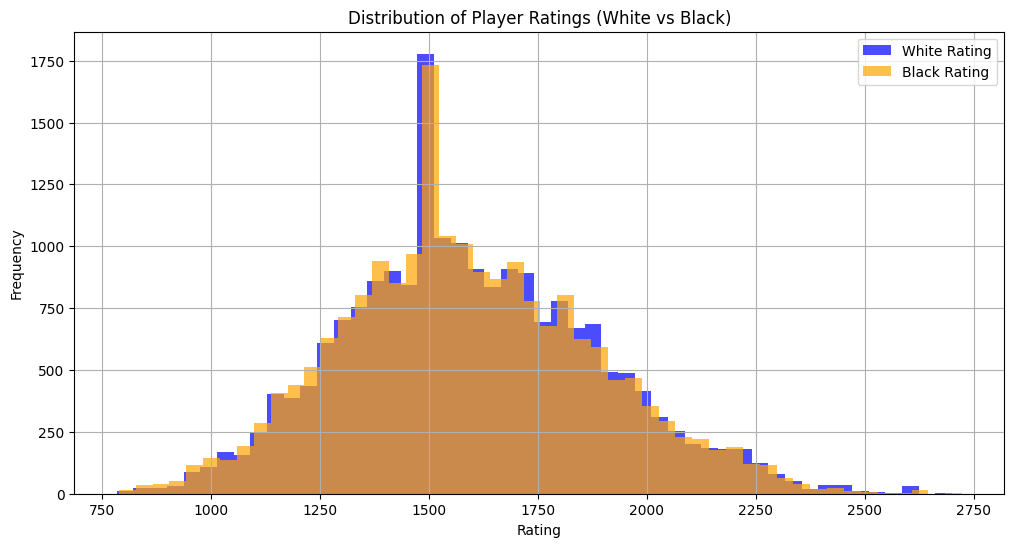

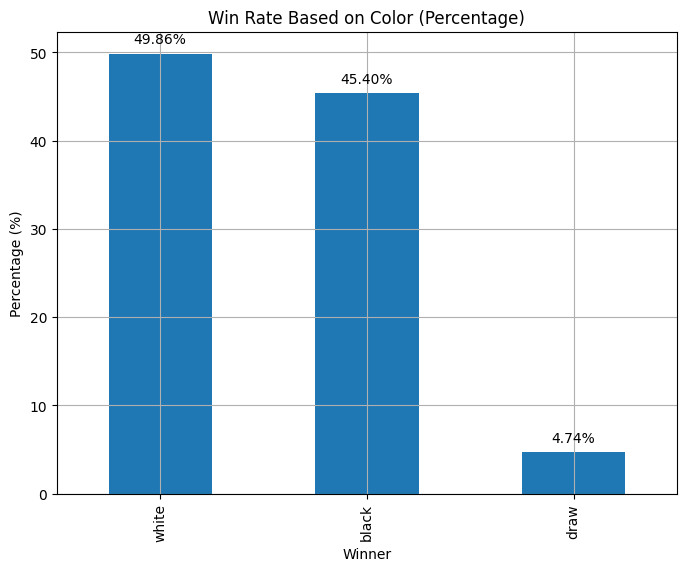

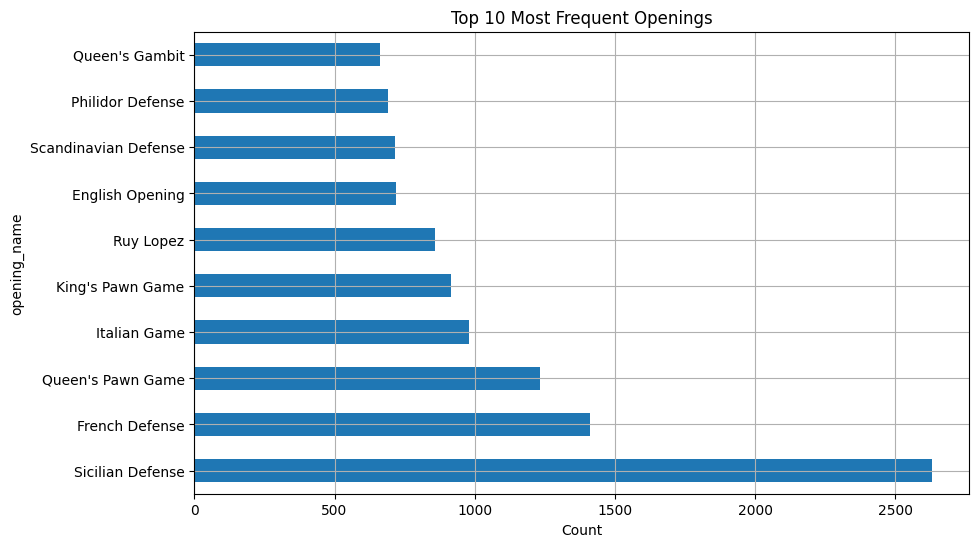

In [15]:
import matplotlib.pyplot as plt

# Plotting distribution of player ratings
plt.figure(figsize=(12, 6))
plt.hist(df['white_rating'], bins=50, alpha=0.7, label='White Rating', color='blue')
plt.hist(df['black_rating'], bins=50, alpha=0.7, label='Black Rating', color='orange')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings (White vs Black)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Analyzing win rate based on color
color_outcomes = df['winner'].value_counts(normalize = True)*100
ax = color_outcomes.plot(kind='bar', figsize=(8, 6))
plt.title('Win Rate Based on Color (Percentage)')
plt.ylabel('Percentage (%)')
plt.xlabel('Winner')
plt.grid(True)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

# Analyzing the impact of openings on outcomes
top_openings = df['opening_name'].value_counts().nlargest(10)
top_openings.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Frequent Openings')
plt.xlabel('Count')
plt.grid(True)
plt.show()


We have an almost normal distribution for the players' ratings distribution. 
Also we see white having more wins than black and lower cases of drawish games. 
Another observation is the openings frequency. 
We see Sicilian and French defense mostly used. 
But let's take a look at how the opening decides the winners

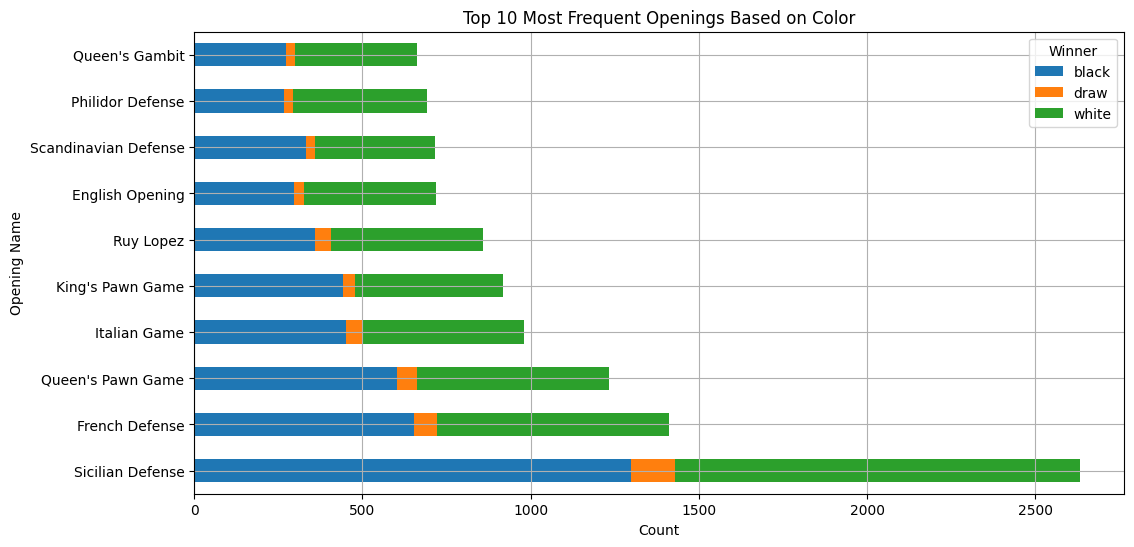

In [16]:
# Group by opening and winner color
openings_by_color = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)


top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

top_openings_by_color.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Top 10 Most Frequent Openings Based on Color')
plt.xlabel('Count')
plt.ylabel('Opening Name')
plt.grid(True)
plt.legend(title='Winner')
plt.show()


In [ ]:
import matplotlib.pyplot as plt


openings_by_color = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)


top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

# Calculate percentage for each winner category within each opening
top_openings_by_color_percentage = top_openings_by_color.div(top_openings_by_color.sum(axis=1), axis=0) * 100


ax = top_openings_by_color_percentage.plot(kind='barh', stacked=True, figsize=(12, 6))


for i in range(len(top_openings_by_color_percentage)):
    cumulative_sum = 0  # This will keep track of the cumulative sum for each bar
    for j, winner in enumerate(top_openings_by_color_percentage.columns):
        width = top_openings_by_color_percentage.iloc[i, j]  # The percentage value for this segment
        if width > 0:  # Only annotate non-zero values
            ax.annotate(f'{width:.1f}%', 
                        xy=(cumulative_sum + width / 2, i),  # Position at the middle of the segment
                        ha='center', va='center')
            cumulative_sum += width  

plt.title('Top 10 Most Frequent Openings - Win Distribution by Color (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Opening Name')
plt.grid(True)
plt.legend(title='Winner')
plt.show()


White Wins More: In most of the openings, white wins more frequently than black. This is consistent with the general advantage of playing as white, as white moves first and can dictate the pace of the game.


Black Wins Prominent in Certain Openings: Black has an advantage in openings like the Sicilian Defense, Queen's pawn game (which is kind of surprising), and Philidor Defense, which are designed to neutralize white's first-move advantage.


Draws: Draws appear relatively less frequent across all openings, with slightly more draws in the Queen's Pawn Game, Sicilian defense, French defense, Italian game, and Ruy Lopez. 

## Rating comparison between rated and non-rated games. 

Well, rated games are supposed to be considered more serious than non-rated games. But let's see if it's same from our data

In [ ]:

# Rating comparison between rated and non-rated games
plt.figure(figsize=(12, 6))
df[df['rated'] == True]['white_rating'].plot(kind='hist', bins=50, alpha=0.5, label='White Rating (Rated)', color='blue')
df[df['rated'] == True]['black_rating'].plot(kind='hist', bins=50, alpha=0.5, label='Black Rating (Rated)', color='orange')
df[df['rated'] == False]['white_rating'].plot(kind='hist', bins=50, alpha=0.5, label='White Rating (Non-Rated)', color='green')
df[df['rated'] == False]['black_rating'].plot(kind='hist', bins=50, alpha=0.5, label='Black Rating (Non-Rated)', color='red')
plt.title('Rating Comparison between Rated and Non-Rated Games')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Rating difference vs Win Likelihood
- How does the rating gap (white rating minus black rating) influence the likelihood of winning?
- Are there certain ranges of rating differences where one side tends to win more?

In [ ]:
# Create a new column for rating difference (white - black)
df['rating_difference'] = df['white_rating'] - df['black_rating']

# Plot rating difference based on winner
plt.figure(figsize=(12, 6))
df[df['winner'] == 'white']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='White Wins', color='green')
df[df['winner'] == 'black']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Black Wins', color='blue')
df[df['winner'] == 'draw']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Draw', color='orange')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')
plt.title('Impact of Rating Difference on Game Outcome')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Probability distribution based on ratings differences
- What is the probability of winning based on how much higher the white player’s rating is compared to the black player's?
- What is the rating gap where wins/draws are most likely?

In [ ]:

rating_bins = pd.cut(df['rating_difference'], bins=[-1000, -400, -200, 0, 200, 400, 1000])

# Calculate winning percentage for white, black, and draw in each rating bin
winning_percentage = df.groupby([rating_bins, 'winner'], observed = False).size().unstack(fill_value=0)
winning_percentage = winning_percentage.div(winning_percentage.sum(axis=1), axis=0) * 100


winning_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Winning Percentage Based on Rating Difference')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Winning Percentage (%)')
plt.grid(True)
plt.legend(title='Outcome')
plt.show()


We get a peculiar result here as it's not surprising: if the ratign difference is in favor of black, black wins, and if in favor of white, white wins, and if there re barely any much difference, the games end in draws. 


## Correlations

In [ ]:
# Convert winner to binary: white = 1, black = 0
df['white_wins'] = df['winner'].apply(lambda x: 1 if x == 'white' else (-1 if x == 'black' else 0))

# Calculate correlation between ratings and win rate
corr_white = df[['white_rating', 'white_wins']].corr().iloc[0, 1]
corr_black = df[['black_rating', 'white_wins']].corr().iloc[0, 1]

print(f"Correlation between white rating and white win rate: {corr_white}")
print(f"Correlation between black rating and white win rate: {corr_black}")


In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

relevant_columns = df[['white_rating', 'black_rating', 'white_wins', 'rating_difference', 'rated']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Ratings, Wins, and Game Features')
plt.show()



1. **White Rating vs. Black Rating (0.63)**:
   - There's a **positive correlation (0.63)** between white and black ratings. This indicates that players who face each other in a game tend to have somewhat similar ratings, which makes sense since chess platforms typically match players of similar skill levels.

2. **White Rating vs. White Wins (0.14)**:
   - There is a **weak positive correlation (0.14)** between **white_rating** and **white_wins**. This suggests that higher-rated white players tend to win slightly more often, but the correlation is not very strong.

3. **Black Rating vs. White Wins (-0.17)**:
   - There is a **weak negative correlation (-0.17)** between **black_rating** and **white_wins**. This suggests that the higher the black player's rating, the less likely it is that white will win. Again, the correlation is weak.

4. **Rating Difference vs. White Wins (0.36)**:
   - The correlation between **rating_difference** (white rating minus black rating) and **white_wins** is **moderate and positive (0.36)**. This implies that when the rating difference favors white (i.e., white has a higher rating than black), white is more likely to win, which aligns with the expectation that higher-rated players tend to win more often.

5. **White Rating vs. Rating Difference (0.43)** and **Black Rating vs. Rating Difference (-0.43)**:
   - These two values show that **rating_difference** is positively correlated with white's rating and negatively correlated with black's rating. This is expected because the rating difference is calculated as (white rating - black rating).

6. **Rated Games vs. Other Variables**:
   - The **"rated"** column shows almost no correlation with the other variables (values close to 0). This indicates that whether the game is rated or not doesn't have a significant impact on the ratings or outcomes (white_wins, rating_difference).

In [ ]:
# Plot outcomes of rated vs. non-rated games
plt.figure(figsize=(8, 6))
df.groupby(['rated', 'winner']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Game Outcomes in Rated vs. Non-Rated Games')
plt.xlabel('Rated Game')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
df.columns

In [ ]:
df['winner'].unique()

In [ ]:
df.head(5)

# Modelling

In [ ]:
# Encoding the target variable: white = 1, black = -1, draw = 0
df['target'] = df['winner'].apply(lambda x: 1 if x == 'white' else (-1 if x == 'black' else 0))

# One-hot encode the opening name
df = pd.get_dummies(df, columns=['opening_name'], drop_first=True)

column_to_select  = ['white_rating', 'black_rating', 'opening_name', 'rated']


In [ ]:
# Find all the columns that start with 'opening_name_' (these are the one-hot encoded columns)
opening_columns = [col for col in df.columns if col.startswith('opening_name_')]

# Now, select white_rating, black_rating, and rated, along with all the opening_name columns
columns_to_select = ['white_rating', 'black_rating', 'rated'] + opening_columns

# Create the feature matrix
X = df[columns_to_select]

# Target variable
y = df['target']

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model training example: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


There are issues with these metrics. 

We have the f1-svore for draws (0) to be very low and this is most likely due to samples imbalance. We have far fewer number of samples for draw-ish games. 

Before I deal with that, let me test other classifiers

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model performances
model_performances = {}

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Use unscaled data as Naive Bayes does not require scaling
y_pred_nb = nb_model.predict(X_test)
model_performances['Naive Bayes'] = (
    accuracy_score(y_test, y_pred_nb), 
    classification_report(y_test, y_pred_nb, target_names=['black_win', 'draw', 'white_win'])
)

# Support Vector Machine (using scaled data)
svm_model = SVC(random_state=42, probability=True)  # Enable probability predictions
svm_model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred_svm = svm_model.predict(X_test_scaled)
model_performances['SVM'] = (
    accuracy_score(y_test, y_pred_svm), 
    classification_report(y_test, y_pred_svm, target_names=['black_win', 'draw', 'white_win'])
)

# K-Nearest Neighbors (using scaled data)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred_knn = knn_model.predict(X_test_scaled)
model_performances['KNN'] = (
    accuracy_score(y_test, y_pred_knn), 
    classification_report(y_test, y_pred_knn, target_names=['black_win', 'draw', 'white_win'])
)

# Gradient Boosting (does not require scaling)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)  # Use unscaled data
y_pred_gb = gb_model.predict(X_test)
model_performances['Gradient Boosting'] = (
    accuracy_score(y_test, y_pred_gb), 
    classification_report(y_test, y_pred_gb, target_names=['black_win', 'draw', 'white_win'])
)

# Displaying results
for model_name, (accuracy, report) in model_performances.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)


Similar issues...

We can use class weights to address class imbalance 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight

# Dictionary to store model performances
model_performances = {}

# 1. Random Forest with class weights (using scaled data)
rf_model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train_scaled, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test_scaled)

# Evaluate Random Forest
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
report_rf_weighted = classification_report(y_test, y_pred_rf_weighted, target_names=['black_win', 'draw', 'white_win'])

# Store Random Forest performance
model_performances['Random Forest (Weighted)'] = {
    'Accuracy': accuracy_rf_weighted,
    'Classification Report': report_rf_weighted
}

# 2. Gradient Boosting with sample weights (using scaled data)
# Compute sample weights for the training set
sample_weights = compute_sample_weight('balanced', y_train)

# Fit Gradient Boosting with sample weights
gb_model_weighted = GradientBoostingClassifier(random_state=42)
gb_model_weighted.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_pred_gb_weighted = gb_model_weighted.predict(X_test_scaled)

# Evaluate Gradient Boosting
accuracy_gb_weighted = accuracy_score(y_test, y_pred_gb_weighted)
report_gb_weighted = classification_report(y_test, y_pred_gb_weighted, target_names=['black_win', 'draw', 'white_win'])

# Store Gradient Boosting performance
model_performances['Gradient Boosting (Weighted)'] = {
    'Accuracy': accuracy_gb_weighted,
    'Classification Report': report_gb_weighted
}


In [ ]:
model_performances

In [ ]:

# Print the results for each model
for model_name, performance in model_performances.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {performance['Accuracy']}")
    print(f"Classification Report:\n{performance['Classification Report']}")
    print('-' * 80)

Okay.. 
There is a slight improvement, but I can still try something. 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Applying SMOTE to the training set to oversample the 'draw' class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)  # Use the scaled X_train

# Rebuilding the Gradient Boosting model with the resampled data
gb_model_smote = GradientBoostingClassifier(random_state=42)
gb_model_smote.fit(X_train_resampled, y_train_resampled)

# Making predictions on the scaled test set
y_pred_gb_smote = gb_model_smote.predict(X_test_scaled)

# Evaluating the model after SMOTE oversampling
accuracy_smote = accuracy_score(y_test, y_pred_gb_smote)
report_smote = classification_report(y_test, y_pred_gb_smote, target_names=['black_win', 'draw', 'white_win'])

# Display the results
print(f"Accuracy after SMOTE: {accuracy_smote}")
print(f"Classification Report after SMOTE:\n{report_smote}")


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_smote)
cm_df = pd.DataFrame(cm, index=['black_win', 'draw', 'white_win'], columns=['black_win', 'draw', 'white_win'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extracting precision, recall, and f1-score from the classification report
report_dict = classification_report(y_test, y_pred_gb_smote, target_names=['black_win', 'draw', 'white_win'], output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().iloc[:3, :3]  # Select precision, recall, and f1 for the three classes

# Plotting precision, recall, and f1-score as bar charts
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_weighted)
cm_df = pd.DataFrame(cm, index=['black_win', 'draw', 'white_win'], columns=['black_win', 'draw', 'white_win'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extracting precision, recall, and f1-score from the classification report
report_dict = classification_report(y_test, y_pred_gb_weighted, target_names=['black_win', 'draw', 'white_win'], output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().iloc[:3, :3]  # Select precision, recall, and f1 for the three classes

# Plotting precision, recall, and f1-score as bar charts
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Overall, we see that Gradient boosting gives a better prediction, but Gradient boosting on unscaled data

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Gradient Boosting (does not require scaling)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)  # Use unscaled data
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_gb = classification_report(y_test, y_pred_gb, target_names=['black_win', 'draw', 'white_win'])
# Printing the results
print(f"Accuracy after SMOTE: {accuracy_gb}")
print(f"Classification Report after SMOTE:\n{classification_gb}")


In [ ]:
cm = confusion_matrix(y_test, y_pred_gb)
cm_df = pd.DataFrame(cm, index=['black_win', 'draw', 'white_win'], columns=['black_win', 'draw', 'white_win'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Overall, we've been able to tell some things from our EDA: 

- Ratings matters in decision of games
- Openings is also a big factor for both colors

Our model is not performing well cos of undersampling of games that ends in a draw. 